# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

df_clean = pd.read_csv('/content/booking_hotel_clean.csv')

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

## Average Lead Time on Cancellation Bookings by Hotel Type

In [2]:
df_clean.head()

,hotel,is_canceled,lead_time,stays_in_weekend_nights,stays_in_weekdays_nights,meal_type,city,market_segment,distribution_channel,is_repeated_guest,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest,date,date_normalize
0,Resort Hotel,0,342,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,2017-09-01,2017-09-01
1,Resort Hotel,0,737,0,0,Breakfast,Kota Denpasar,Direct,Direct,0,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,2017-09-01,2017-09-01
2,Resort Hotel,0,7,0,1,Breakfast,Kabupaten Bangka,Direct,Direct,0,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,2017-09-01,2017-09-01
3,Resort Hotel,0,13,0,1,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,2017-09-01,2017-09-01
4,Resort Hotel,0,14,0,2,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,...,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2017-09-01,2017-09-01


In [3]:
#Select the column

leadtime = df_clean[['hotel', 'is_canceled', 'lead_time', 'date_normalize']]

In [4]:
#Split dataset by Hotel Type

leadtime['is_canceled'].replace({0:'No', 1:'Yes'}, inplace=True)
alt_resort = leadtime[leadtime['hotel'] == 'Resort Hotel']
alt_city = leadtime[leadtime['hotel'] == 'City Hotel']

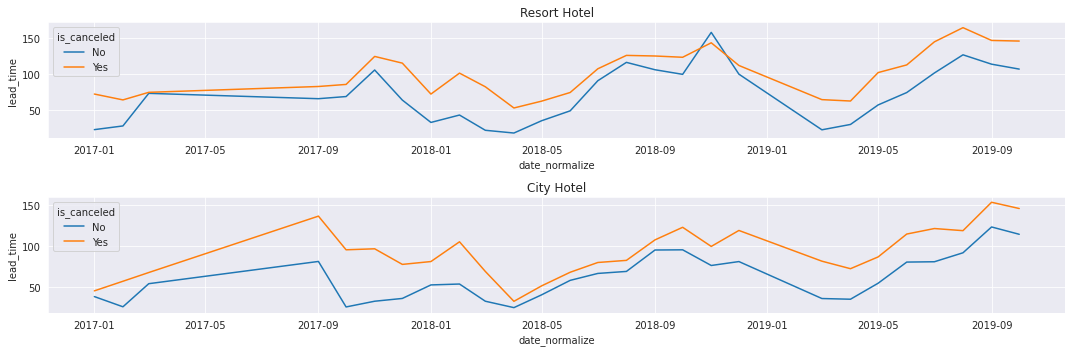

In [5]:
#Resort Hotel
alt_resort_grouped = alt_resort.groupby(['date_normalize','is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_resort_grouped['date_normalize'] = pd.to_datetime(alt_resort_grouped['date_normalize'])

#City Hotel
alt_city_grouped = alt_city.groupby(['date_normalize','is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_city_grouped['date_normalize'] = pd.to_datetime(alt_city_grouped['date_normalize'])

#Visualize
fig, ax = plt.subplots(2,1,figsize=(15,5))
sns.lineplot(data=alt_resort_grouped, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[0])
sns.lineplot(data=alt_city_grouped, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[1])
ax[0].title.set_text('Resort Hotel')
ax[1].title.set_text('City Hotel')
plt.tight_layout()
plt.show()


In [6]:
#Export Dataset
alt_resort_grouped.to_csv('alt_resort.csv', index=False)
alt_city_grouped.to_csv('alt_city.csv', index=False)

## Average Lead Time on Cancellation Bookings by Lead Time Category

In [7]:
#Use Statistic Descriptive to Grouping the Lead Time
leadtime['lead_time'].describe()

count    86129.000000
mean        79.246224
std         85.498774
min          0.000000
25%         11.000000
50%         49.000000
75%        124.000000
max        737.000000
Name: lead_time, dtype: float64

In [8]:
#Grouping Lead Time 
conditions = [
    leadtime['lead_time'].isin(list(range(0,12))),
    leadtime['lead_time'].isin(list(range(12,50))),
    leadtime['lead_time'].isin(list(range(50,125))),
    leadtime['lead_time'].isin(list(range(125,295))),
    leadtime['lead_time'].isin(list(range(295,738)))
]

choices = ['last_minute', 'short_lead', 'medium_lead', 'long_lead', 'very_long_lead']

leadtime['lead_category'] = np.select(conditions, choices)

In [9]:
#Split dataset by Lead Time

lastminute = leadtime[leadtime['lead_category'] == 'last_minute']
shortlead = leadtime[leadtime['lead_category'] == 'short_lead']
mediumlead = leadtime[leadtime['lead_category'] == 'medium_lead']
longlead = leadtime[leadtime['lead_category'] == 'long_lead']
verylonglead = leadtime[leadtime['lead_category'] == 'very_long_lead']

In [10]:
#Grouping dataset

alt_lastminute = lastminute.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_shortlead = shortlead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_mediumlead = mediumlead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_longlead = longlead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()
alt_verylonglead = verylonglead.groupby(['hotel', 'date_normalize', 'is_canceled']).agg({'lead_time':'mean'}).reset_index()

In [ ]:
#Visualize

fig, ax = plt.subplots(3,2,figsize=(15,12))
sns.lineplot(data=alt_lastminute, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[0,0])
sns.lineplot(data=alt_shortlead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[0,1])
sns.lineplot(data=alt_mediumlead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[1,0])
sns.lineplot(data=alt_longlead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[1,1])
sns.lineplot(data=alt_verylonglead, x='date_normalize', y='lead_time', hue='is_canceled', ax=ax[2,0])
ax[0,0].set_xticklabels(labels=alt_lastminute.date_normalize,rotation=70)
ax[0,1].set_xticklabels(labels=alt_shortlead.date_normalize,rotation=70)
ax[1,0].set_xticklabels(labels=alt_mediumlead.date_normalize,rotation=70)
ax[1,1].set_xticklabels(labels=alt_longlead.date_normalize,rotation=70)
ax[2,0].set_xticklabels(labels=alt_verylonglead.date_normalize,rotation=70)
ax[0,0].set_title('Last Minute Lead Time')
ax[0,1].set_title('Short Lead Time')
ax[1,0].set_title('Medium Lead Time')
ax[1,1].set_title('Long Lead Time')
ax[2,0].set_title('Very Long Lead Time')
fig.delaxes(ax[2,1])
plt.tight_layout()
plt.show()

In [ ]:
# #Export Dataset
alt_lastminute.to_csv('alt_lastminute.csv', index=False)
alt_shortlead.to_csv('alt_shortlead.csv', index=False)
alt_mediumlead.to_csv('alt_mediumlead.csv', index=False)
alt_longlead.to_csv('alt_longlead.csv', index=False)
alt_verylonglead.to_csv('alt_verylonglead.csv', index=False)